First imported pacakge we might need to data analysis.

In [1]:
import pandas as pd #<-- For shapping tables
import numpy as np #for math stuff if needed
import matplotlib #<-- for Visualisation
import matplotlib.pyplot as plt#<-- for Visualisation
from datetime import datetime #<-- For our time series analysis in case needed
import seaborn as sns # 
import geopandas as gpd 
from shapely.geometry import Point
from geopandas import GeoDataFrame


Nowe We can import the needed data. We have sewershade data, Community gardens data and 

In [2]:
Sshade = pd.read_csv("SewershedData.txt")
CoGardens = pd.read_csv("NYC_Greenthumb_Community_Gardens.csv")

In [3]:
Sshade.shape#find number of culums and rows

(1140, 8)

In [4]:
CoGardens.shape

(536, 17)

In [5]:
CoGardens.head()

,PropID,Boro,Community Board,Council District,Garden Name,Address,Size,Jurisdiction,NeighborhoodName,Cross Streets,Latitude,Longitude,Postcode,Census Tract,BIN,BBL,NTA
0,NaN,M,M03,2.0,11 BC Serenity Garden,626 East 11th Street,0.054,DPR,East Village,Avenues B & C,40.727124,-73.978677,10009,28.0,1000000,1003930020,Lower East Side ...
1,NaN,B,B08,36.0,1100 Bergen Street Community Garden,1101 & 1105 Bergen Street,0.207,PRI,Crown Heights,Nostrand & New York Avenues,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M382,M,M11,9.0,110th Street Block Association,1651 Madison Avenue,0.043,DPR,East Harlem,Active,40.796295,-73.947533,10029,17402.0,1000000,1016160023,East Harlem South ...
3,M331,M,M11,8.0,117th Street Community Garden,172 E 117th Street,0.080,DPR,East Harlem,Active,40.798976,-73.940376,10035,182.0,1089914,1016440046,East Harlem North ...
4,NaN,M,M03,2.0,11th Street Community Garden,422 East 11th Street,0.054,TPL,East Village,1st Avenue & Avenue A,40.729079,-73.983327,10009,34.0,1000000,1004380019,East Village ...


In [6]:
CoGardens = gpd.GeoDataFrame(
    CoGardens, geometry=gpd.points_from_xy(CoGardens.Longitude, CoGardens.Latitude))


In [7]:
CoGardens.head(10)

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


,PropID,Boro,Community Board,Council District,Garden Name,Address,Size,Jurisdiction,NeighborhoodName,Cross Streets,Latitude,Longitude,Postcode,Census Tract,BIN,BBL,NTA,geometry
0,NaN,M,M03,2.0,11 BC Serenity Garden,626 East 11th Street,0.054,DPR,East Village,Avenues B & C,40.727124,-73.978677,10009,28.0,1000000,1003930020,Lower East Side ...,POINT (-73.979 40.727)
1,NaN,B,B08,36.0,1100 Bergen Street Community Garden,1101 & 1105 Bergen Street,0.207,PRI,Crown Heights,Nostrand & New York Avenues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)
2,M382,M,M11,9.0,110th Street Block Association,1651 Madison Avenue,0.043,DPR,East Harlem,Active,40.796295,-73.947533,10029,17402.0,1000000,1016160023,East Harlem South ...,POINT (-73.948 40.796)
3,M331,M,M11,8.0,117th Street Community Garden,172 E 117th Street,0.080,DPR,East Harlem,Active,40.798976,-73.940376,10035,182.0,1089914,1016440046,East Harlem North ...,POINT (-73.940 40.799)
4,NaN,M,M03,2.0,11th Street Community Garden,422 East 11th Street,0.054,TPL,East Village,1st Avenue & Avenue A,40.729079,-73.983327,10009,34.0,1000000,1004380019,East Village ...,POINT (-73.983 40.729)
5,NaN,X,X12,15.0,211th Street Block Association.,Carlisle Place,0.182,NYRP,NaN,At E. 211th Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)
6,NaN,X,X06,15.0,2120 Mapes Avenue HDFC,2124 Mapes Avenue,0.151,TPL,NaN,At E. 181st Street,40.847216,-73.885018,10460,36501.0,2000000,2031110007,East Tremont ...,POINT (-73.885 40.847)
7,B535,B,B05,42.0,400 Montauk Avenue Block Association. (Ismael ...,New Lots Avenue,0.091,DPR,East New York,Active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)
8,M313A,M,M03,1.0,5th Street Slope Garden Club,626-27 East 5th Street,0.031,DPR,East Village,Active,40.723433,-73.980995,10009,2601.0,1075625,1003870020,Lower East Side ...,POINT (-73.981 40.723)
9,NaN,B,B07,38.0,6/15 Green,274 15th Street,0.287,TPL,Park Slope,corner of 6th Avenue & 15th Street,40.664706,-73.987554,11215,141.0,3000000,3010480034,Park Slope-Gowanus ...,POINT (-73.988 40.665)


In [8]:
#

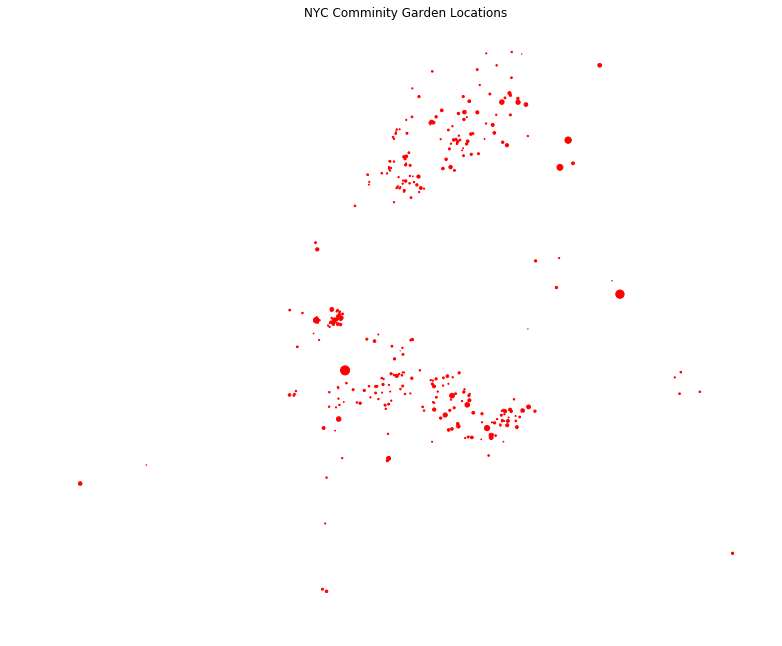

In [9]:
#Plot the gardens and show the relative sizes
CoGardens.plot( color='red',legend=True,figsize=(13, 13),markersize=CoGardens.Size * 30)
plt.axis('off')
plt.title('NYC Comminity Garden Locations')
plt.show()

In [10]:
#Note that a lot of comminuty Gardens doesn't have

In [11]:
Sshade.head() #check out the data for sewerhsade

,OBJECTID,COMB_OR_SE,NewWatrshd,Outfall,Shape__Area,Shape__Length,Shape_Length,Shape_Area
0,1,COMBINED,Alley Creek,TI-008,5.559777e+06,14513.588497,14513.588497,5.559777e+06
1,2,COMBINED,Bronx River,HP-004,3.572993e+06,10927.988770,10927.988770,3.572993e+06
2,3,COMBINED,Bronx River,HP-007,1.008950e+07,40860.702110,40860.702110,1.008950e+07
3,4,COMBINED,Bronx River,HP-008,2.163705e+06,8622.559014,8622.559014,2.163705e+06
4,5,COMBINED,Bronx River,HP-009,2.805350e+06,9179.555815,9179.555815,2.805350e+06


What the culums mean:
OBJECTID - ID
COMB_OR_SE - combined or separatdd
NewWatrshd -  location of watershade
Outfall - the place where a river, drain, or sewer empties into the sea, a river, or a lake.
Shape__Length - length
Shape_Area - area


In [12]:
Sshade.drop("Shape__Area", axis = 1)


,OBJECTID,COMB_OR_SE,NewWatrshd,Outfall,Shape__Length,Shape_Length,Shape_Area
0,1,COMBINED,Alley Creek,TI-008,14513.588497,14513.588497,5.559777e+06
1,2,COMBINED,Bronx River,HP-004,10927.988770,10927.988770,3.572993e+06
2,3,COMBINED,Bronx River,HP-007,40860.702110,40860.702110,1.008950e+07
3,4,COMBINED,Bronx River,HP-008,8622.559014,8622.559014,2.163705e+06
4,5,COMBINED,Bronx River,HP-009,9179.555815,9179.555815,2.805350e+06
...,...,...,...,...,...,...,...
1135,1136,SEPARATE,Newtown Creek,NCQ-632,4042.556217,4042.556217,5.184092e+05
1136,1137,SEPARATE,Westchester Creek,HP-034,3213.204061,3213.204061,3.883712e+05
1137,1138,SEPARATE,Westchester Creek,HP-602,1969.644877,1969.644877,2.116891e+05
1138,1139,SEPARATE,Westchester Creek,HP-635,3559.118157,3559.118157,6.555306e+05


In [13]:
Sshade.drop("Shape__Length", axis = 1)

,OBJECTID,COMB_OR_SE,NewWatrshd,Outfall,Shape__Area,Shape_Length,Shape_Area
0,1,COMBINED,Alley Creek,TI-008,5.559777e+06,14513.588497,5.559777e+06
1,2,COMBINED,Bronx River,HP-004,3.572993e+06,10927.988770,3.572993e+06
2,3,COMBINED,Bronx River,HP-007,1.008950e+07,40860.702110,1.008950e+07
3,4,COMBINED,Bronx River,HP-008,2.163705e+06,8622.559014,2.163705e+06
4,5,COMBINED,Bronx River,HP-009,2.805350e+06,9179.555815,2.805350e+06
...,...,...,...,...,...,...,...
1135,1136,SEPARATE,Newtown Creek,NCQ-632,5.184092e+05,4042.556217,5.184092e+05
1136,1137,SEPARATE,Westchester Creek,HP-034,3.883712e+05,3213.204061,3.883712e+05
1137,1138,SEPARATE,Westchester Creek,HP-602,2.116891e+05,1969.644877,2.116891e+05
1138,1139,SEPARATE,Westchester Creek,HP-635,6.555305e+05,3559.118157,6.555306e+05


In [14]:
#are the outfalls all unique?
Sshade.Outfall.unique()

array(['TI-008', 'HP-004', 'HP-007', ..., 'HP-034', 'HP-602', 'HP-635'],
      dtype=object)

In [15]:
#Water Shades are not unique
len(Sshade.Outfall.unique())

1071

In [16]:
Sshade.NewWatrshd.unique()

array(['Alley Creek', 'Bronx River', 'Coney Island Creek',
       'East River / Open Waters', 'Flushing Bay', 'Flushing Creek',
       'Gowanus Canal', 'Hutchinson River', 'Jamaica Bay and Tributaries',
       'Newtown Creek', 'Westchester Creek'], dtype=object)